# Navigation


### 1. Start the Environment and import necessary packages


In [1]:
from unityagents import UnityEnvironment
import numpy as np

In [2]:
env = UnityEnvironment(file_name="C:/Users/Luca Zangari/Documents/Fuzhi/Udacity/deep-reinforcement-learning/p1_navigation/Banana_Windows_x86_64/Banana.exe")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here check for the first brain available, and set it as the default brain that is being controlled from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

In [4]:
import torch 
import numpy as np
import random 
from collections import deque
import time 
import warnings #for hiding matplotlib deprecate warnings 
import matplotlib.pyplot as plt 
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'  # give high resolution plot outputs for retina display 



### 2. Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 


In [5]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


### 3. Take Random Actions in the Environment

Control the agent and receive feedback from the environment.



In [6]:
env_info = env.reset(train_mode=True)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = np.random.randint(action_size)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

Score: 1.0


### 4. Training the agent with Deep Q_Network

In [7]:
from DeepQNetwork_Agent import Agent 
agent = Agent(state_size = 37, action_size = 4, seed = 42)


In [8]:
def dqn(n_episodes=2200, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.999):

    scores = []                        # score from each episode is inluded in this list 
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        
        env_info = env.reset(train_mode=True)[brain_name]  # reseting the environment
        state = env_info.vector_observations[0]            # takeing the current state

        score = 0
        for t in range(max_t):           
            #action = np.random.randint(action_size)        # selecting an action
            action = agent.act(state, eps)           
            #time.sleep(0.05)
            action = int(action)
            

            env_info = env.step(action)[brain_name]        # sending the action to the environment
            next_state = env_info.vector_observations[0]   # geting the next state
            reward = env_info.rewards[0]                   # geting the reward
            done = env_info.local_done[0]                  # check the episode termination
            
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       
        scores.append(score)              # add most recent score
        eps = max(eps_end, eps_decay*eps) 
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=13.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
            break
    return scores




In [9]:
# Train the agent using DQN
start_time = time.time() # Monitor Training Time  
scores = dqn(n_episodes=2200, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.999)
print("\nTotal Training time = {:.1f} min".format((time.time()-start_time)/60))

Episode 100	Average Score: 0.25
Episode 200	Average Score: 0.72
Episode 300	Average Score: 1.57
Episode 400	Average Score: 2.35
Episode 500	Average Score: 2.99
Episode 600	Average Score: 4.29
Episode 700	Average Score: 5.46
Episode 800	Average Score: 6.01
Episode 900	Average Score: 7.57
Episode 1000	Average Score: 8.00
Episode 1100	Average Score: 8.60
Episode 1200	Average Score: 8.95
Episode 1300	Average Score: 10.23
Episode 1400	Average Score: 10.23
Episode 1500	Average Score: 10.74
Episode 1600	Average Score: 10.93
Episode 1700	Average Score: 11.71
Episode 1800	Average Score: 11.79
Episode 1900	Average Score: 12.11
Episode 1975	Average Score: 13.03
Environment solved in 1875 episodes!	Average Score: 13.03

Total Training time = 25.0 min


In [10]:
#plotting option 
plt.style.use('ggplot')
np.set_printoptions(precision = 5, linewidth = 100)
warnings.filterwarnings("ignore")


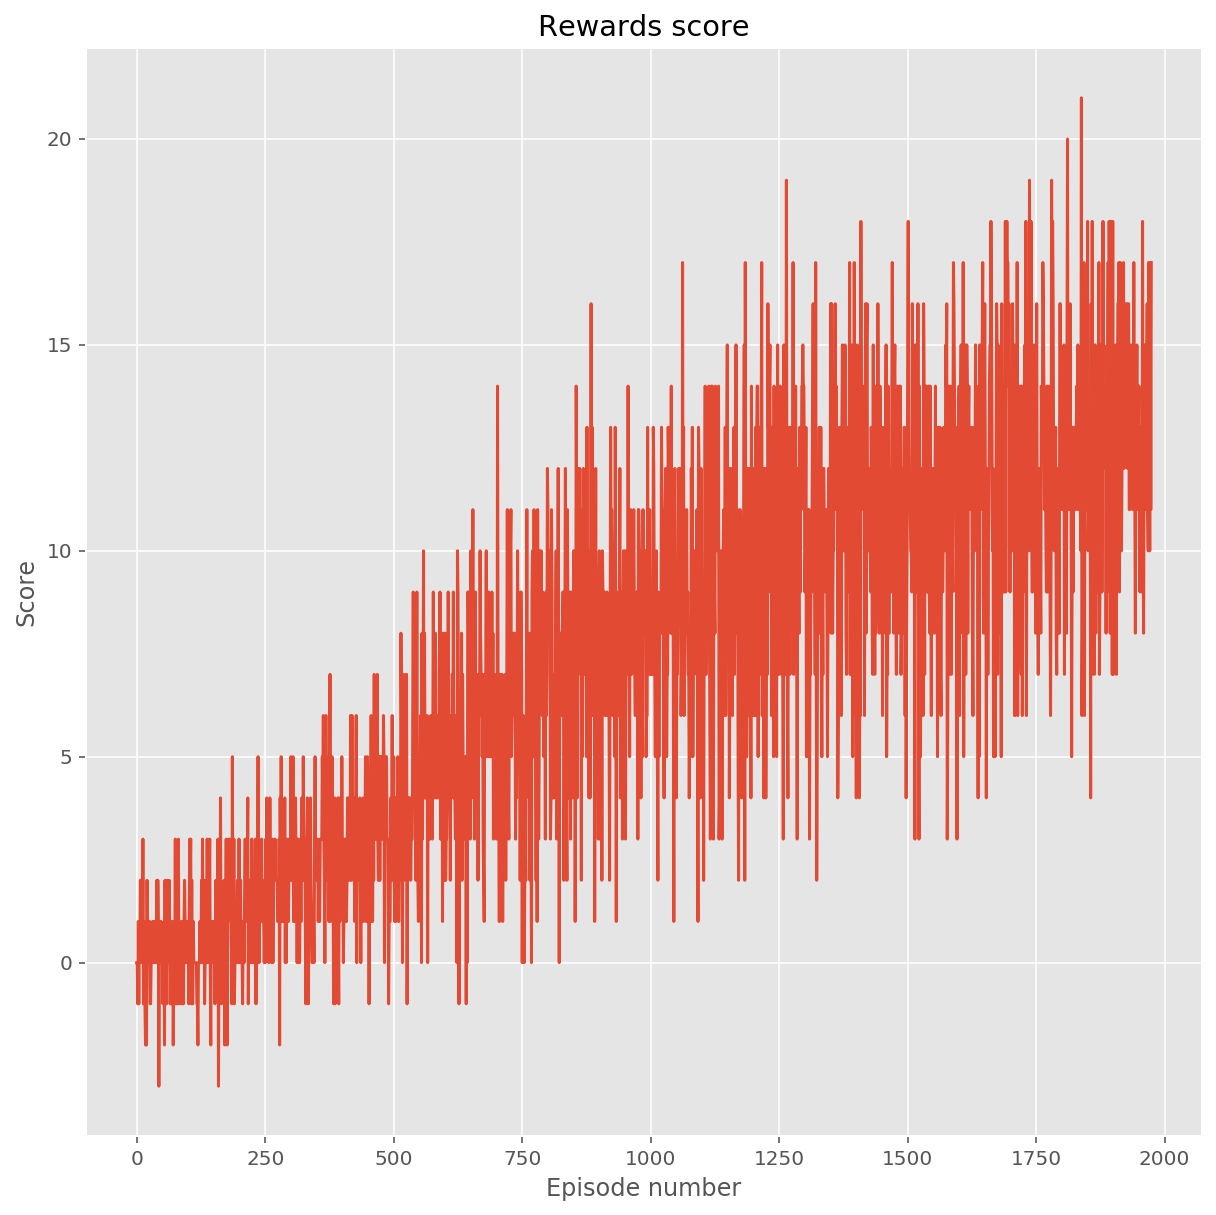

In [11]:
# plot the scores
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.title('Rewards score')
plt.ylabel('Score')
plt.xlabel('Episode number')
plt.grid(True)      
plt.show()

When finished, you can close the environment.

In [12]:
env.close()